# Objectives

Explore features or characteristics to predict price of car
Analyze patterns and run descriptive statistical analysis
Group data based on identified parameters and create pivot tables
Identify the effect of independent attributes on price of cars

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [33]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())
            
            

ModuleNotFoundError: No module named 'pyodide'

In [34]:
file_path= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv"

In [35]:
await download(file_path, "usedcars.csv")
file_name="usedcars.csv"

NameError: name 'download' is not defined

In [51]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [59]:
df = pd.read_csv(file_name, names=headers)

NameError: name 'file_name' is not defined

In [60]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(filepath,names=headers)

In [61]:
df.head()

symboling normalized-losses  \
symboling normalized-losses make         aspiration      num-of-doors   
3         122               alfa-romero         std               two   
                            alfa-romero         std               two   
1         122               alfa-romero         std               two   
2         164               audi                std              four   

                                                make     fuel-type  \
symboling normalized-losses make          body-style  drive-wheels   
3         122               alfa-romero  convertible           rwd   
                            alfa-romero  convertible           rwd   
1         122               alfa-romero    hatchback           rwd   
2         164               audi               sedan           fwd   

                                              aspiration num-of-doors  \
symboling normalized-losses make         engine-location   wheel-base   
3         122               alfa-romero            front         88.6   
                            alfa-romero            front         88.6   
1         122               alfa-romero            front         94.5   
2         164               audi                   front         99.8   

                                                 body-style  \
symboling normalized-losses make                     length   
3         122               alfa-romero  0.8111484863046613   
                            alfa-romero  0.8111484863046613   
1         122               alfa-romero  0.8226814031715521   
2         164               audi         0.8486304661220567   

                                               drive-wheels engine-location  \
symboling normalized-losses make                      width          height   
3         122               alfa-romero  0.8902777777777777            48.8   
                            alfa-romero  0.8902777777777777            48.8   
1         122               alfa-romero  0.9097222222222222            52.4   
2         164               audi         0.9194444444444444            54.3   

                                          wheel-base  ...        engine-size  \
symboling normalized-losses make         curb-weight  ...  compression-ratio   
3         122               alfa-romero         2548  ...                9.0   
                            alfa-romero         2548  ...                9.0   
1         122               alfa-romero         2823  ...                9.0   
2         164               audi                2337  ...               10.0   

                                        fuel-system      bore    stroke  \
symboling normalized-losses make         horsepower  peak-rpm  city-mpg   
3         122               alfa-romero       111.0    5000.0        21   
                            alfa-romero       111.0    5000.0        21   
1         122               alfa-romero       154.0    5000.0        19   
2         164               audi              102.0    5500.0        24   

                                        compression-ratio horsepower  \
symboling normalized-losses make              highway-mpg      price   
3         122               alfa-romero                27    13495.0   
                            alfa-romero                27    16500.0   
1         122               alfa-romero                26    16500.0   
2         164               audi                       30    13950.0   

                                                   peak-rpm  \
symboling normalized-losses make               city-L/100km   
3         122               alfa-romero  11.190476190476188   
                            alfa-romero  11.190476190476188   
1         122               alfa-romero   12.36842105263158   
2         164               audi          9.791666666666666   

                                                  city-mpg highway-mpg price  
symboling normalized-losses make         horsepower-binned      di

Analyzing Individual Feature Patterns Using Visualization

In [62]:
%matplotlib inline

In [63]:
#Analyzing list of data types for eacch column
print(df.dtypes)

symboling            object
normalized-losses    object
make                 object
fuel-type            object
aspiration           object
num-of-doors         object
body-style           object
drive-wheels         object
engine-location      object
wheel-base           object
length               object
width                object
height               object
curb-weight          object
engine-type          object
num-of-cylinders     object
engine-size          object
fuel-system          object
bore                 object
stroke               object
compression-ratio    object
horsepower           object
peak-rpm             object
city-mpg             object
highway-mpg          object
price                object
dtype: object


In [64]:
df["peak-rpm"].dtypes

dtype('O')

Analyzing the correlation between variables

In [65]:
df.corr()

ValueError: could not convert string to float: 'aspiration'

In [66]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

ValueError: could not convert string to float: 'peak-rpm'

# Engine size as potential predictor variable of price

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U4'), dtype('float64')) -> None

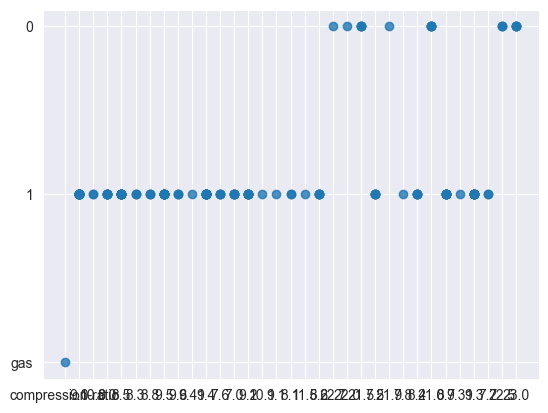

In [67]:
sns.regplot(x="engine-size",y="price",data=df)

In [68]:
df[["engine-size","price"]].corr()

ValueError: could not convert string to float: 'compression-ratio'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U1'), dtype('float64')) -> None

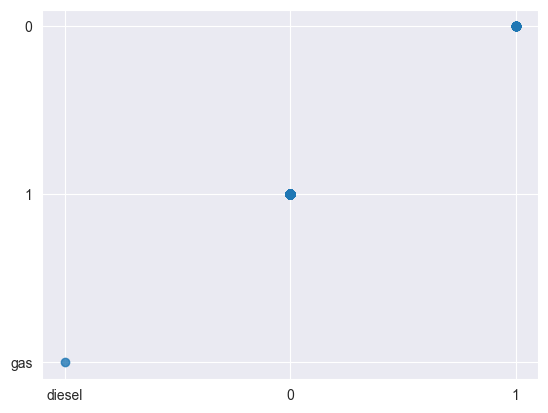

In [69]:
sns.regplot(x="highway-mpg", y="price", data=df)

In [70]:
df[['highway-mpg', 'price']].corr()

ValueError: could not convert string to float: 'diesel'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U18'), dtype('float64')) -> None

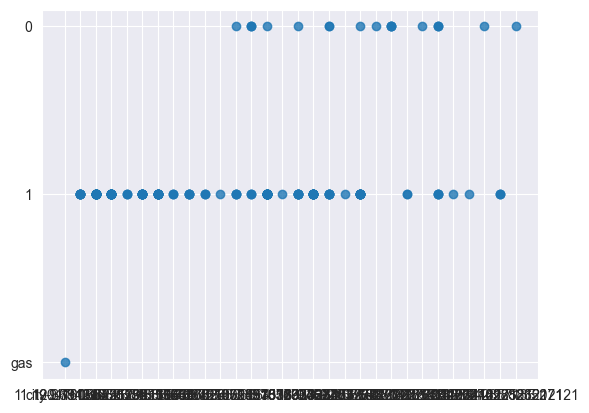

In [71]:
sns.regplot(x="peak-rpm", y="price", data=df)

In [72]:
df[['peak-rpm','price']].corr()

ValueError: could not convert string to float: 'city-L/100km'

In [73]:
df[["stroke","price"]].corr()

ValueError: could not convert string to float: 'city-mpg'

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

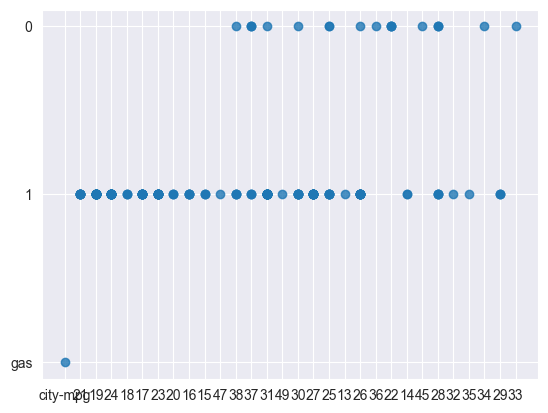

In [74]:
sns.regplot(x="stroke", y="price", data=df)

<Axes: xlabel='body-style', ylabel='price'>

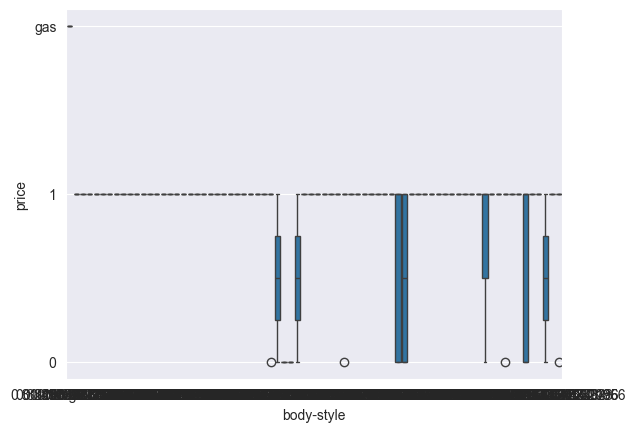

In [75]:
sns.boxplot(x="body-style", y="price", data=df)

<Axes: xlabel='engine-size', ylabel='price'>

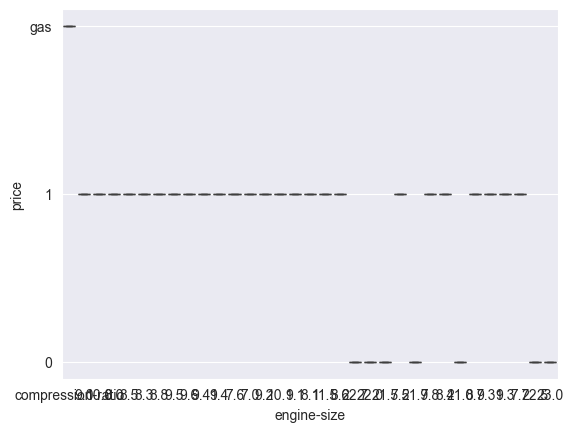

In [77]:
sns.boxplot(x ="engine-size", y="price", data=df)

<Axes: xlabel='drive-wheels', ylabel='price'>

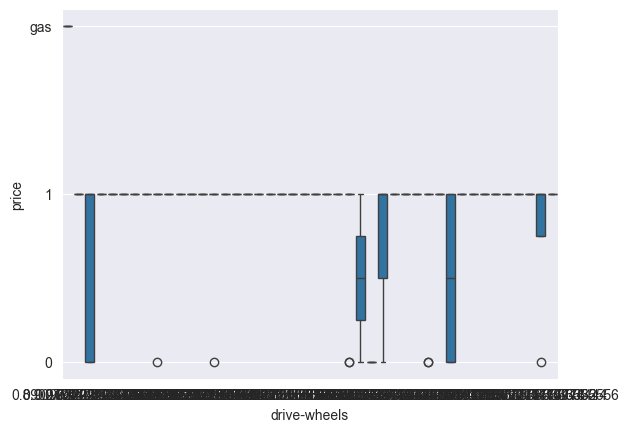

In [78]:
sns.boxplot(x="drive-wheels", y="price", data=df)

Descriptive Statistical Analysis

In [79]:
df.describe()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,201,202,202
unique,3,3,6,4,3,53,74,44,50,170,...,33,60,24,30,31,187,30,4,3,3
top,std,four,sedan,fwd,front,93.7,0.7558865929841423,0.8861111111111111,50.8,2385,...,9.0,68.0,5500.0,31,25,8921.0,7.580645161290323,Low,0,1
freq,165,115,94,118,198,20,15,24,14,4,...,46,19,36,28,19,2,28,115,181,181


In [80]:
df.describe(include='object')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,202,202,202,202,202,202,202,202,202,202,...,202,202,202,202,202,202,202,201,202,202
unique,3,3,6,4,3,53,74,44,50,170,...,33,60,24,30,31,187,30,4,3,3
top,std,four,sedan,fwd,front,93.7,0.7558865929841423,0.8861111111111111,50.8,2385,...,9.0,68.0,5500.0,31,25,8921.0,7.580645161290323,Low,0,1
freq,165,115,94,118,198,20,15,24,14,4,...,46,19,36,28,19,2,28,115,181,181


Value Counts

In [81]:
df['drive-wheels'].value_counts()

drive-wheels
0.8861111111111111    24
0.9236111111111112    23
0.9083333333333334    15
0.95                  10
0.8944444444444445    10
0.8833333333333333     9
0.8888888888888888     9
0.9097222222222222     8
0.9055555555555556     7
0.9333333333333332     6
0.9111111111111109     6
0.8916666666666667     6
0.9208333333333332     6
0.9291666666666668     5
0.9569444444444444     4
0.9125                 4
0.8999999999999999     4
0.9430555555555556     4
0.8875                 3
0.9027777777777778     3
0.9916666666666668     3
0.9763888888888888     3
0.9958333333333332     3
0.9486111111111112     2
0.8972222222222221     2
0.9666666666666666     2
0.8902777777777777     2
0.9402777777777778     2
0.9180555555555556     2
0.925                  1
0.8805555555555555     1
width                  1
0.9805555555555556     1
0.9444444444444444     1
1.0                    1
0.9791666666666666     1
0.8583333333333333     1
0.9166666666666666     1
0.8680555555555556     1
0.8374999999

<Axes: xlabel='drive-wheels'>

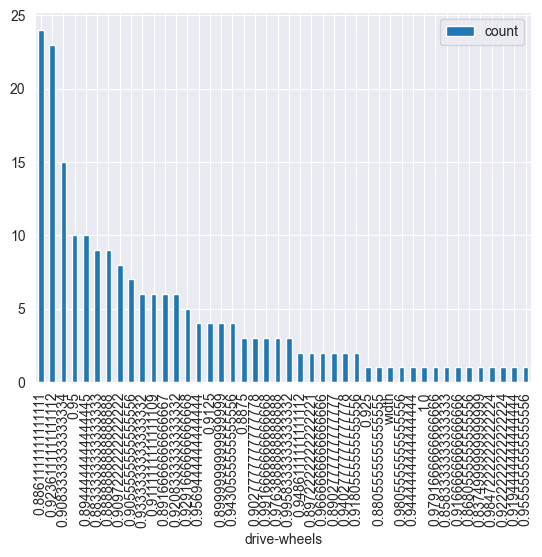

In [84]:
df['drive-wheels'].value_counts().to_frame().plot(kind='bar')

In [87]:
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,count
drive-wheels,
0.8861111111111111,24
0.9236111111111112,23
0.9083333333333334,15
0.95,10
0.8944444444444445,10
0.8833333333333333,9
0.8888888888888888,9
0.9097222222222222,8
0.9055555555555556,7


In [88]:
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,count
drive-wheels,
0.8861111111111111,24
0.9236111111111112,23
0.9083333333333334,15
0.95,10
0.8944444444444445,10
0.8833333333333333,9
0.8888888888888888,9
0.9097222222222222,8
0.9055555555555556,7


In [90]:
# engine-location as variable

engine_loc_counts= df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

,count
engine-location,
50.8,14
55.7,12
54.5,10
54.1,10
52.0,9
55.5,9
54.3,8
56.7,8
51.6,7


Basics of Grouping

In [91]:
df['drive-wheels'].unique()

array(['width', '0.8902777777777777', '0.9097222222222222',
       '0.9194444444444444', '0.9222222222222224', '0.9208333333333332',
       '0.9916666666666668', '0.8999999999999999', '0.9291666666666668',
       '0.9430555555555556', '0.9847222222222224', '0.8374999999999999',
       '0.8833333333333333', '0.8861111111111111', '0.8972222222222221',
       '0.8875', '0.8888888888888888', '0.9055555555555556',
       '0.8680555555555556', '0.9166666666666666', '0.8583333333333333',
       '0.9666666666666666', '0.9805555555555556', '0.8916666666666667',
       '0.9125', '0.9236111111111112', '0.9180555555555556',
       '0.9763888888888888', '0.9958333333333332', '0.9791666666666666',
       '1.0', '0.9444444444444444', '0.8944444444444445',
       '0.9083333333333334', '0.95', '0.9486111111111112',
       '0.9027777777777778', '0.925', '0.8805555555555555',
       '0.9111111111111109', '0.9402777777777778', '0.9333333333333332',
       '0.9569444444444444', '0.9555555555555556'], dtype

In [92]:
df_group_one=df[['drive-wheels','body-style','price']]

In [93]:
# grouping results
df_group_one = df_group_one.groupby(['drive-wheels'],as_index=False).mean()
df_group_one

TypeError: agg function failed [how->mean,dtype->object]

In [94]:
# grouping results
df_gptest = df[['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

TypeError: agg function failed [how->mean,dtype->object]

In [95]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

NameError: name 'grouped_test1' is not defined

In [96]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

NameError: name 'grouped_pivot' is not defined

In [97]:
# grouping results
df_gptest2 = df[['body-style','price']]
grouped_test_bodystyle = df_gptest2.groupby(['body-style'],as_index= False).mean()
grouped_test_bodystyle

TypeError: agg function failed [how->mean,dtype->object]

In [98]:
#use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

NameError: name 'grouped_pivot' is not defined

NameError: name 'grouped_pivot' is not defined

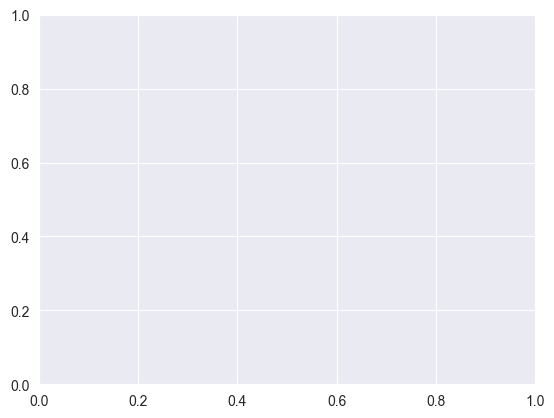

In [99]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# Correlation and Causation

In [100]:
df.corr()

ValueError: could not convert string to float: 'aspiration'

In [101]:
from scipy import stats

Wheel-Base vs. Price

In [102]:
pearson_coef,p_value= stats.pearsonr(df['wheel-base'],df['price'])
print("The Pearson Correlation Coefficient is",pearson_coef,"with a p-value of p=",p_value)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [103]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value )

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [104]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value) 

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [105]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [106]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [107]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [108]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

TypeError: unsupported operand type(s) for +: 'float' and 'str'